In [3]:
from ultralytics import YOLO
import supervision as sv
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
model = YOLO(model='yolov8x.pt')
model.fuse()

YOLOv8x summary (fused): 112 layers, 68,200,608 parameters, 0 gradients, 257.8 GFLOPs


In [7]:
CLASS_NAMES_DICT = model.model.names

# class_ids of interest - car, motorcycle, bus, truck
classes = [2, 3, 5, 7]

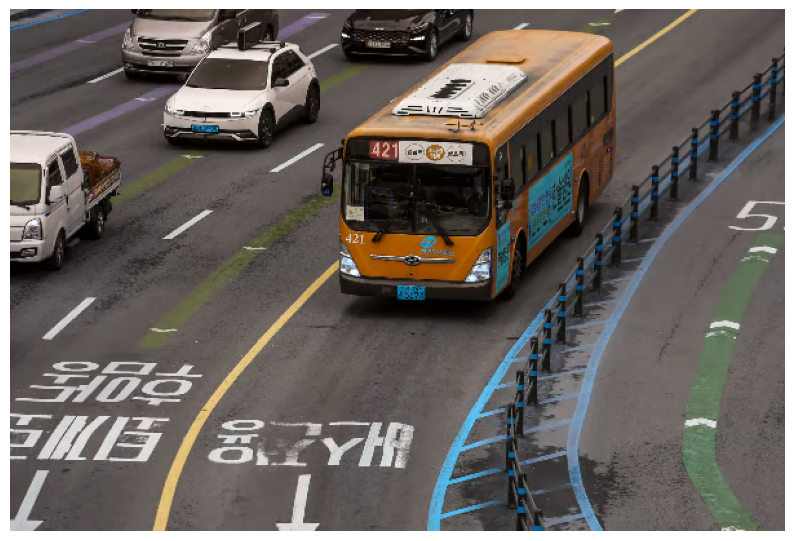

In [20]:
image_path = 'img/testImage.png'
frame = cv2.imread(image_path)
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
sv.plot_image(frame_rgb, (10, 10))

감지된 차량 수: 5


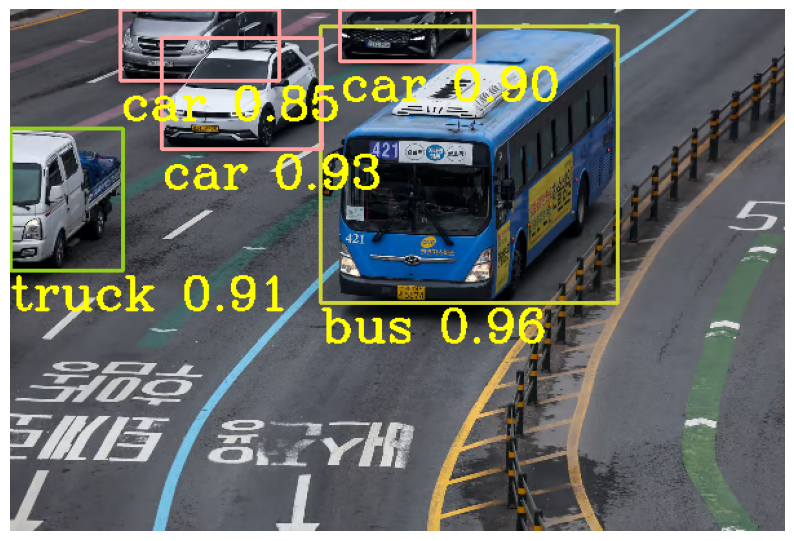

In [24]:
# detect vehicles from the frame
results = model(frame, verbose=False)[0]

# convert to detections
detections = sv.Detections.from_ultralytics(results)

# only consider classes which we require
detections = detections[np.isin(detections.class_id, classes)]

# 차량 수 계산
vehicle_count = len(detections)

# create instance of box annotator
box_annotator = sv.BoxAnnotator(thickness=2)
# annotate in the frame
annotated_frame = box_annotator.annotate(scene=frame.copy(), detections=detections)

# format Labels
labels = []
for confidence, class_id in zip(detections.confidence, detections.class_id) :
    label = f'{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}'
    labels.append(label)

# overlay Labels in the boundingbox
for box, label in zip(detections.xyxy, labels) :
    x1, y1, x2, y2 = box.astype(int)

    # display the Label
    cv2.putText(
        annotated_frame, label, (x1, y2 + 30), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=1.2, 
        color=(0, 255, 255), thickness=2
    )

print(f"감지된 차량 수: {vehicle_count}")

sv.plot_image(annotated_frame, (10, 10))